In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import re

# !pip show soynlp

In [3]:
df = pd.read_csv('./data/petition.csv', parse_dates=['start', 'end'])

keywords = r'.*(반려동물|심리|음악).*'
df = df[df['title'].str.match(keywords) | df['content'].str.match(keywords, flags=re.MULTILINE)]
df.shape
df.head()

,article_id,start,end,answered,votes,category,title,content
7,28,2017-08-19,2017-08-26,0,2137,경제민주화,소액주주를 보호해주십시오,** 존경하옵는 문재인대통령님께\n저는 중국원양자원이라는 KOSPI상장사의 소액 ...
36,59,2017-08-19,2017-10-18,0,2,반려동물,"유기동물 재발방지를 위한 반려동물 번식업, 반려동물 판매업, 반려동물 등록법 개정 요구",안녕하세요.\n사람과 동물과 자연을 소중하게 생각하는 국민으로서 청원합니다.\n우리...
80,104,2017-08-20,2017-11-18,0,3,육아/교육,공통사회 임용 선발,국민신문고에 같은 내용을 민원을 올렸는데요.\n제 의견의 합당하나 정책반영은 힘들다...
81,105,2017-08-20,2017-09-19,0,2212,육아/교육,중등교과교사티오 증원을 요청합니다.(제발 읽어주세요),저는 중등학교 현직교사입니다.\n중등교사 가티오를 본 후 충격을 받고 글을 쓰게 ...
88,112,2017-08-20,2017-11-18,0,1391,보건복지,여가부 산하 해바라기센터 심리치료사 자격기준 강화필요,저는 여가부 산하 해바라기센터 심리치료사의 부적절한 자격 요건 에 대한\n규정 수정...


In [4]:
# 자연어 처리 - 전처리, 토큰화, 명사 추출
from soynlp.tokenizer import RegexTokenizer

tokenizer = RegexTokenizer()

In [5]:
sample_index = 36

In [8]:
sample_title = df['title'][sample_index]
sample_title

'유기동물 재발방지를 위한 반려동물 번식업, 반려동물 판매업, 반려동물 등록법 개정 요구'

In [9]:
sample_content = df['content'][sample_index]
sample_content

'안녕하세요.\\n사람과 동물과 자연을 소중하게 생각하는 국민으로서 청원합니다.\\n우리나라는 매년 유기동물 수가 급증하고 있습니다.\\n이는 사람들이 반려동물을 입양할 때 소중한 생명이고 가족으로서 평생을 책임지겠다는 책임감이 없이 너무 쉽게 장난감 사듯이 사고 반려동물이 질병이 생기거나, 귀찮거나 실증이 나거나, 이사가거나, 휴가가거나, 외국에 간다는 이유로 버릴때도 장난감 버리듯이 유기하기때문입니다.\\n이에 청원합니다.\\n1. 동물은 소중한 생명체이고 반려동물을 유기하는 것은 가족을 버리는 것과 같다는 것과 동물을 학대하면 불법이라는 것을 심야 시간이 아닌 낮이나 저녁 시간대에 지상파 방송을 통해 널리 홍보해 주세요.\\n2. 동물 번식장의 환경과 돌물의 처우를 개선해 주시고 잘 지켜지는지 엄격히 관리 감독해 주세요.\\n동물 번식장의 환경 규정을 지금보다 더 동물 입장에서 생각하여 법을 개정해 주세요.\\n번식업자의 사육단가가 비싸지면 분양가격이 비싸져서 꼭 반려동물을 키우고 싶은 사람, 끝까지 책임질 수 있는 사람들만 분양을 받기 때문에 유기동물을 줄일 수 있습니다.\\n3. 분양하는 강아지와 고양이의 연령을 3개월령 이상으로 법으로 규정해 주세요.\\n2개월 미만의 강아지와 고양이를 분양하는 것은 동물의 면역이 생기기 전에 분양하는 것이므로 폐사율이 높아집니다.\\n또한 현재 시행되고 있는 반려동물 등록제에 적용되는 칩이 3개월령 이상에만 이식할 수 있는데 지금처럼 분양 후 보호자가 나중에 칩을 이식하게 하지 말고(안하는 보호자가 많습니다.) 판매자가 보호자에게 분양할 때 바로 칩을 이식해서 분양 하도록 법을 개정해 주세요.\\n현재 등록제에 개만 해당되고 있는데 고양이도 해당되도록 법을 개정해 주세요.\\n또한 등록제에 인식칩과 인식표 중 선택할 수 있게 되어 있는데 유기동물 감소를 위하여 인식칩만을 인정하도록 법을 개정해 주세요.\\n또, 칩에 기록되는 내용에 주민등록번호를 추가해 주세요.\\n지금은 전화 번호와 주소만 기록하도록 되어있으나 

In [10]:
tokened_title = tokenizer.tokenize(sample_title)
tokened_title

['유기동물',
 '재발방지를',
 '위한',
 '반려동물',
 '번식업',
 ',',
 '반려동물',
 '판매업',
 ',',
 '반려동물',
 '등록법',
 '개정',
 '요구']

In [11]:
tokened_content = tokenizer.tokenize(sample_content)
tokened_content[:10]

['안녕하세요', '.\\', 'n', '사람과', '동물과', '자연을', '소중하게', '생각하는', '국민으로서', '청원합니다']

In [12]:
print(len(tokened_title))
print(len(tokened_content))

13
355


In [13]:
# 텍스트 데이터 전처리
def preprocessing(text):
    # 개행문자 제거
    text = re.sub('\\\\n', ' ', text)
    return text

In [14]:
# %time을 찍어주면 해당 코드를 실행할 때 걸리는 시간을 출력
%time sentences = df['content'].apply(preprocessing)

CPU times: user 47.4 ms, sys: 5.18 ms, total: 52.5 ms
Wall time: 55.8 ms


In [15]:
%time tokens = sentences.apply(tokenizer.tokenize)
tokens[:3]

CPU times: user 11.7 s, sys: 90.4 ms, total: 11.8 s
Wall time: 11.8 s


7     [**, 존경하옵는, 문재인대통령님께, 저는, 중국원양자원이라는, KOSPI, 상장...
36    [안녕하세요, ., 사람과, 동물과, 자연을, 소중하게, 생각하는, 국민으로서, 청...
80    [국민신문고에, 같은, 내용을, 민원을, 올렸는데요, ., 제, 의견의, 합당하나,...
Name: content, dtype: object

In [16]:
tokens[sample_index][:10]

['안녕하세요', '.', '사람과', '동물과', '자연을', '소중하게', '생각하는', '국민으로서', '청원합니다', '.']

In [17]:
# 불용어(stopword) 제거
stopwords_kr = ['하지만', '그리고', '그런데', '저는', '제가', '그럼', '이런', '저런', '합니다', '많은', '많이', '정말', '너무']

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data=None, backgroundcolor='white', width=800, height=600):
    wordcloud = WordCloud(
                        font_path = '/usr/share/fonts/truetype/naver-d2coding/D2Coding-Ver1.3.2-20180524-all.ttc',
                        stopwords = stopwords_kr,
                        background_color = backgroundcolor,
                        width = width,
                        height = height).generate(data)

    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

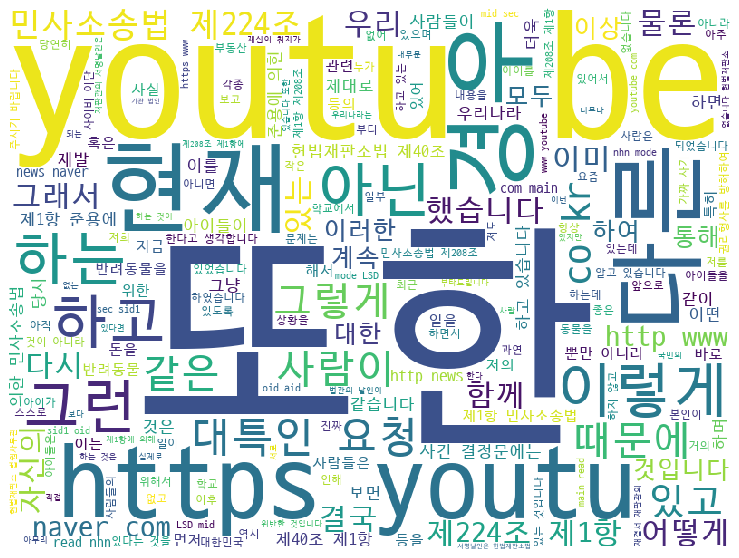

CPU times: user 13 s, sys: 518 ms, total: 13.5 s
Wall time: 13.7 s


In [19]:
%time displayWordCloud(' '.join(sentences))

In [22]:
from soynlp.noun import LRNounExtractor

In [23]:
%%time
noun_extractor = LRNounExtractor(verbose=True)
noun_extractor.train(sentences)

# 명사만 추출
nouns = noun_extractor.extract()

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (115755, 58503) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 20546 nouns are extracted
CPU times: user 24 s, sys: 106 ms, total: 24.1 s
Wall time: 24.1 s


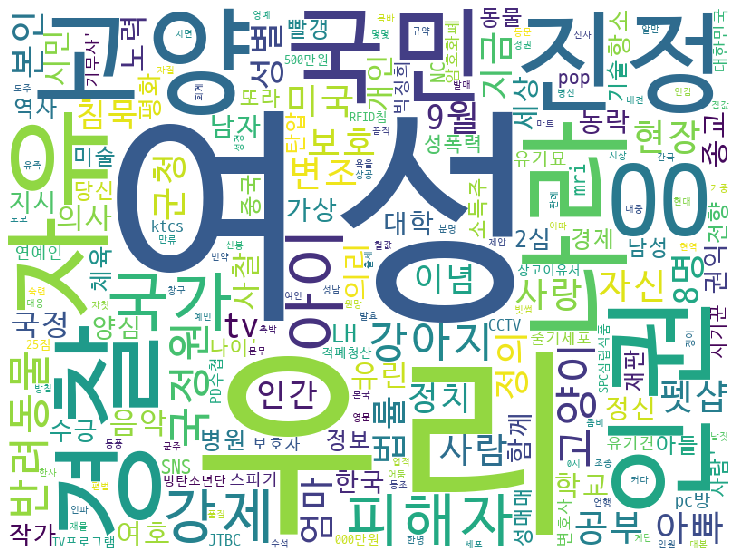

CPU times: user 1.1 s, sys: 34.6 ms, total: 1.13 s
Wall time: 1.15 s


In [24]:
%time displayWordCloud(' '.join(nouns))